# Lecture 11 – Data 100, Fall 2023

Data 100, Fall 2023

[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from h2o.display import display
from mpl_toolkits.mplot3d import Axes3D

## Evaluate the Simple Linear Regression Model

We will first define some helper functions to calculate the regression line for us.

In [3]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

In [4]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)

def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\theta_0: {ahat:.2f}, \theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig
RESID

1

Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [5]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

task: 
1. create 4 datasets in the form of dataframes: x and y1, y2, y3 consequently, then x4 with y4.
2. then create a dictionary with these 4 datasets, naming the keys I to IV.

In [6]:
I = zip(x, y1)
I

**Using zip alone doesnt print anything since it is an `iterator` object like a `for` loop - you have to either list it out or using a for loop (for i in zip(hdjfhdj), print) to see whats being paired up.** 

In [7]:
I = list(zip(x, y1))
I

[(10, 8.04),
 (8, 6.95),
 (13, 7.58),
 (9, 8.81),
 (11, 8.33),
 (14, 9.96),
 (6, 7.24),
 (4, 4.26),
 (12, 10.84),
 (7, 4.82),
 (5, 5.68)]

In [8]:
I = pd.DataFrame(zip(x, y1)) # the uni uses pd...(list(zip()) but we dont need list here
I

,0,1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [9]:
anscombe = {
    'I': pd.DataFrame(zip(x, y1)),
    'II': pd.DataFrame(zip(x, y2)),
    'III': pd.DataFrame(zip(x, y3)),
    'IV': pd.DataFrame(zip(x4, y4))
}
anscombe

{'I':      0      1
 0   10   8.04
 1    8   6.95
 2   13   7.58
 3    9   8.81
 4   11   8.33
 5   14   9.96
 6    6   7.24
 7    4   4.26
 8   12  10.84
 9    7   4.82
 10   5   5.68,
 'II':      0     1
 0   10  9.14
 1    8  8.14
 2   13  8.74
 3    9  8.77
 4   11  9.26
 5   14  8.10
 6    6  6.13
 7    4  3.10
 8   12  9.13
 9    7  7.26
 10   5  4.74,
 'III':      0      1
 0   10   7.46
 1    8   6.77
 2   13  12.74
 3    9   7.11
 4   11   7.81
 5   14   8.84
 6    6   6.08
 7    4   5.39
 8   12   8.15
 9    7   6.42
 10   5   5.73,
 'IV':      0      1
 0    8   6.58
 1    8   5.76
 2    8   7.71
 3    8   8.84
 4    8   8.47
 5    8   7.04
 6    8   5.25
 7   19  12.50
 8    8   5.56
 9    8   7.91
 10   8   6.89}

In [10]:
anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
} # add columns otherwise it would be 0 and 1 which is still fine

In [11]:
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Dataset I: theta_0: 3.00, theta_1: 0.50
Dataset II: theta_0: 3.00, theta_1: 0.50
Dataset III: theta_0: 3.00, theta_1: 0.50
Dataset IV: theta_0: 3.00, theta_1: 0.50


Looks like all four datasets have exactly the same fit. 

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [12]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118




However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

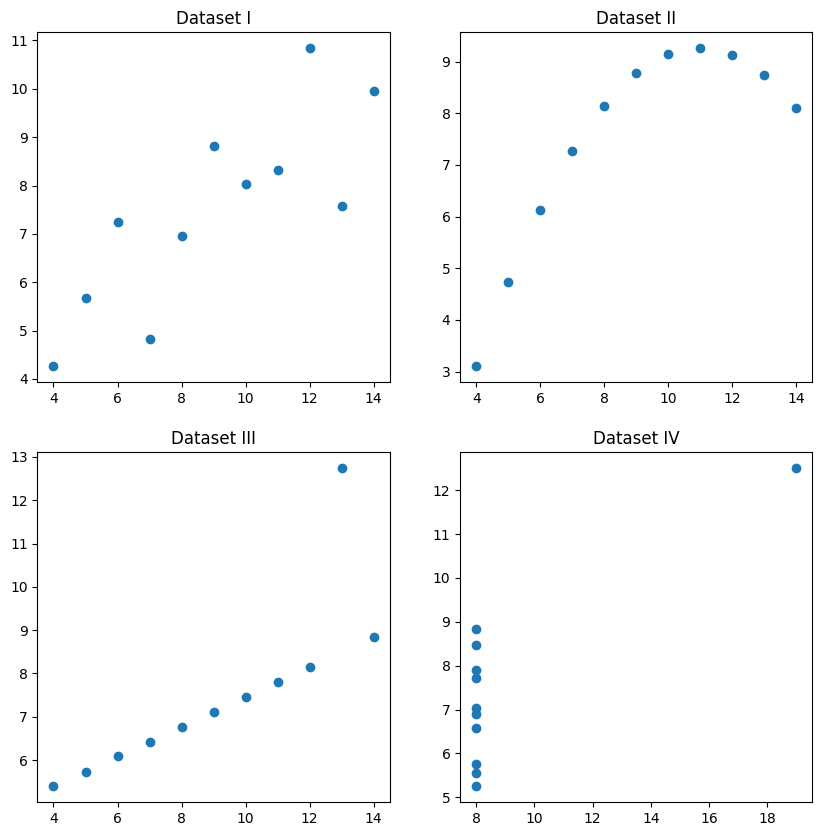

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


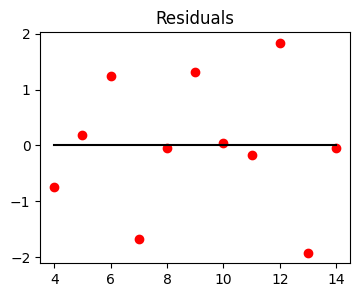



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.119


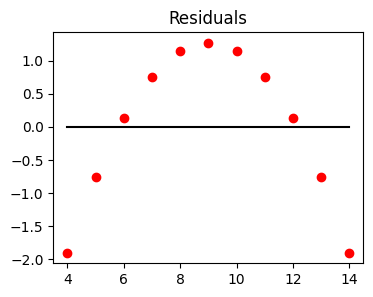



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


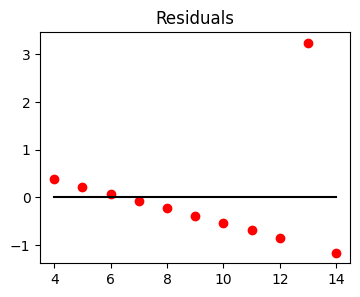



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
	heta_0: 3.00, 	heta_1: 0.50
RMSE: 1.118


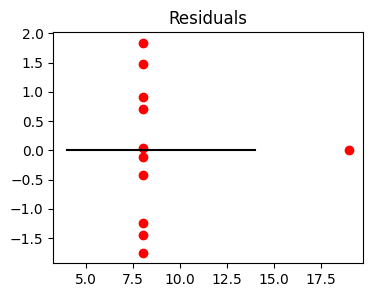

In [14]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

The takeaway here is that you should always visualize your datasets before fitting any models to it!

---
<br/>



## Dugongs Part 1: Comparing Two Different Models, Both Fit with MSE

In [18]:
dugongs = pd.read_csv("D:\github\data\data100\data\dugongs.csv")
dugongs

,Length,Age
0,1.77,1.5
1,1.80,1.0
2,1.85,1.5
3,1.87,1.5
4,2.02,2.5
5,2.15,5.0
6,2.19,8.5
7,2.26,5.0
8,2.26,9.0
9,2.27,4.0


In [19]:
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

### Loss Surfaces

Computes constant loss surface. As a reminder, the average loss of the constant model is

$$
\Large
\hat{R}(\theta_0) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta_0)^2
$$

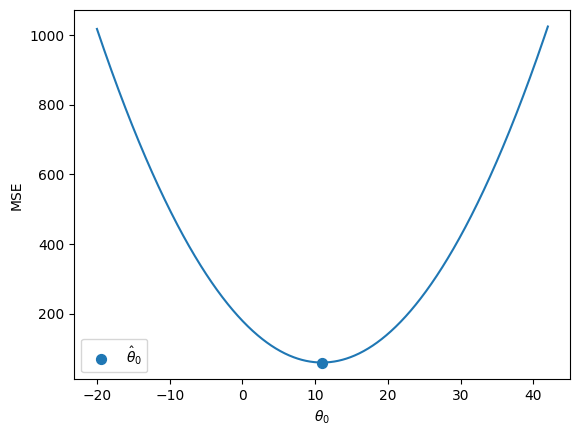

In [26]:
def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend();

Computes 3D loss surface. As a reminder, the average loss for the SLR model is

$$
\Large
\hat{R}(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - (\theta_0 + \theta_1x))^2
$$

In [34]:
x = dugongs["Length"]
y = dugongs["Age"]
y

0      1.5
1      1.0
2      1.5
3      1.5
4      2.5
5      5.0
6      8.5
7      5.0
8      9.0
9      4.0
10    12.0
11     7.0
12     9.5
13     9.5
14    10.0
15    13.0
16     8.0
17    13.0
18    15.5
19    12.0
20    14.5
21    17.0
22    31.5
23    16.5
24    15.5
25    22.5
26    29.0
Name: Age, dtype: float64

In [44]:
theta_0_values = np.linspace(-80, 20, 80)
theta_0_values

array([-80.        , -78.73417722, -77.46835443, -76.20253165,
       -74.93670886, -73.67088608, -72.40506329, -71.13924051,
       -69.87341772, -68.60759494, -67.34177215, -66.07594937,
       -64.81012658, -63.5443038 , -62.27848101, -61.01265823,
       -59.74683544, -58.48101266, -57.21518987, -55.94936709,
       -54.6835443 , -53.41772152, -52.15189873, -50.88607595,
       -49.62025316, -48.35443038, -47.08860759, -45.82278481,
       -44.55696203, -43.29113924, -42.02531646, -40.75949367,
       -39.49367089, -38.2278481 , -36.96202532, -35.69620253,
       -34.43037975, -33.16455696, -31.89873418, -30.63291139,
       -29.36708861, -28.10126582, -26.83544304, -25.56962025,
       -24.30379747, -23.03797468, -21.7721519 , -20.50632911,
       -19.24050633, -17.97468354, -16.70886076, -15.44303797,
       -14.17721519, -12.91139241, -11.64556962, -10.37974684,
        -9.11392405,  -7.84810127,  -6.58227848,  -5.3164557 ,
        -4.05063291,  -2.78481013,  -1.51898734,  -0.25

In [46]:
theta_1_values = np.linspace(-10, 30, 80)
theta_1_values

array([-10.        ,  -9.49367089,  -8.98734177,  -8.48101266,
        -7.97468354,  -7.46835443,  -6.96202532,  -6.4556962 ,
        -5.94936709,  -5.44303797,  -4.93670886,  -4.43037975,
        -3.92405063,  -3.41772152,  -2.91139241,  -2.40506329,
        -1.89873418,  -1.39240506,  -0.88607595,  -0.37974684,
         0.12658228,   0.63291139,   1.13924051,   1.64556962,
         2.15189873,   2.65822785,   3.16455696,   3.67088608,
         4.17721519,   4.6835443 ,   5.18987342,   5.69620253,
         6.20253165,   6.70886076,   7.21518987,   7.72151899,
         8.2278481 ,   8.73417722,   9.24050633,   9.74683544,
        10.25316456,  10.75949367,  11.26582278,  11.7721519 ,
        12.27848101,  12.78481013,  13.29113924,  13.79746835,
        14.30379747,  14.81012658,  15.3164557 ,  15.82278481,
        16.32911392,  16.83544304,  17.34177215,  17.84810127,
        18.35443038,  18.86075949,  19.36708861,  19.87341772,
        20.37974684,  20.88607595,  21.39240506,  21.89

In [63]:
# mean_sqr_err = np.mean((y - yhat)**2) for y in theta_1_values
# sub in yhat = theta0 + x.theta1
mean_sqr_err = np.array([
    np.mean((np.array((y - (theta_0 + theta_1 * x)) ** 2 for x in theta_0_values)) for y in theta_1_values)
    ])
mean_sqr_err

TypeError: unsupported operand type(s) for /: 'generator' and 'int'

In [52]:
def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10, 30, 80)
mse_values = np.array([[mse_linear(x,y,data_linear) for x in theta_0_values] for y in theta_1_values])

data_x, data_y = data_linear.iloc[:, 0], data_linear.iloc[:, 1]
theta_1_hat = np.corrcoef(data_x, data_y)[0, 1] * np.std(data_y) / np.std(data_x)
theta_0_hat = np.mean(data_y) - theta_1_hat * np.mean(data_x)
mse_values

array([[13165.07851852, 12877.3231137 , 12592.77232352, ...,
          384.61479891,   343.61472176,   305.81925926],
       [12893.7293881 , 12608.96733073, 12327.40988802, ...,
          343.75342271,   305.74669302,   270.94457797],
       [12625.21351113, 12343.44480122, 12064.88070596, ...,
          305.72529996,   270.71191772,   238.90315014],
       ...,
       [  561.29508638,   504.02743577,   449.96439982, ...,
         5528.38844155,  5717.87611862,  5910.56841033],
       [  508.10647202,   453.83216887,   402.76248037, ...,
         5705.68758141,  5898.16860593,  6093.85424511],
       [  457.75111111,   406.47015542,   358.39381438, ...,
         5885.81997472,  6081.2943467 ,  6279.97333333]])

In [ ]:

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(theta_0_values, theta_1_values)
surf = ax.plot_surface(X, Y, mse_values, cmap='viridis', alpha=0.6) # Use alpha to make it slightly transparent

sc = ax.scatter([theta_0_hat], [theta_1_hat], [mse_linear(theta_0_hat, theta_1_hat, data_linear)],
                marker='o', color='red', s=100, label='theta hat')

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cost Value')

ax.set_title('MSE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MSE')

### RMSE

In [13]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Least Squares Constant Model RMSE: 7.722422059764398
Least Squares Linear Model RMSE:   4.311332860288157


Interpret the RMSE (Root Mean Square Error):
* Constant model error is HIGHER than linear model error
* Linear model is BETTER than constant model (at least for this metric)

### Predictions

This plotting code is left for your reference. We'll mainly look at the figures in lecture.

In [14]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_constant = [thetahat for i in range(n)]    # Not used, but food for thought
yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]

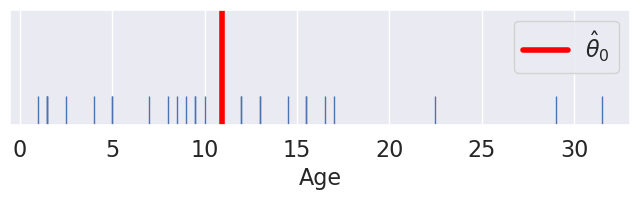

In [15]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()

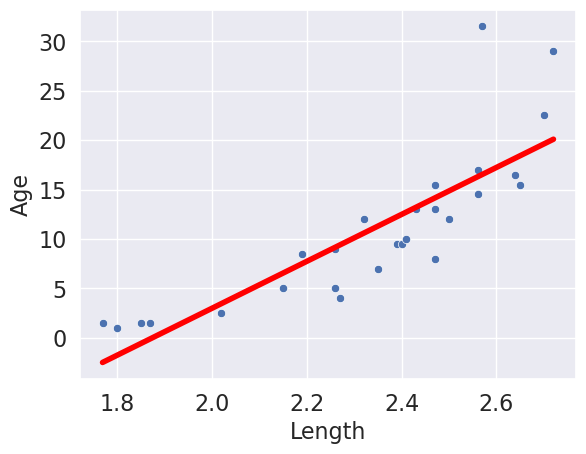

In [16]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

<br/><br/>

---

## Boba Tea:  Two Constant Models, Fit to Different Losses

### Exploring MAE

In [17]:
boba = np.array([20, 21, 22, 29, 33])

Let's plot the $L_1$ loss for a **single** observation. We'll plot the $L_1$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$
\Large
L_1(20, \theta_0) = |20 - \theta_0|
$$

In [18]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = np.abs(boba[0] - thetas)

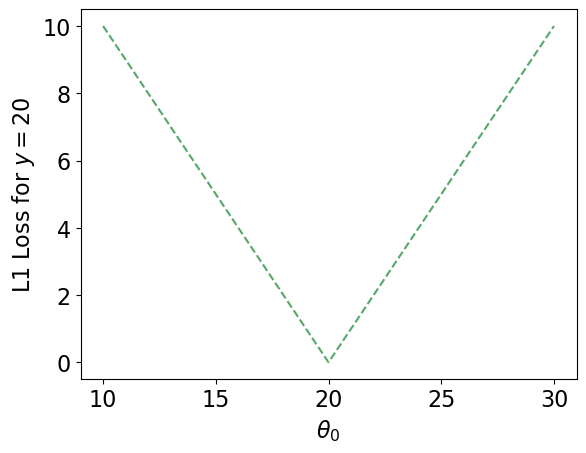

In [19]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

plt.plot(thetas, l1_loss_single_obvs,  'g--', );
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'L1 Loss for $y = 20$');
# plt.savefig('l1_loss_single_obs.png', bbox_inches = 'tight');

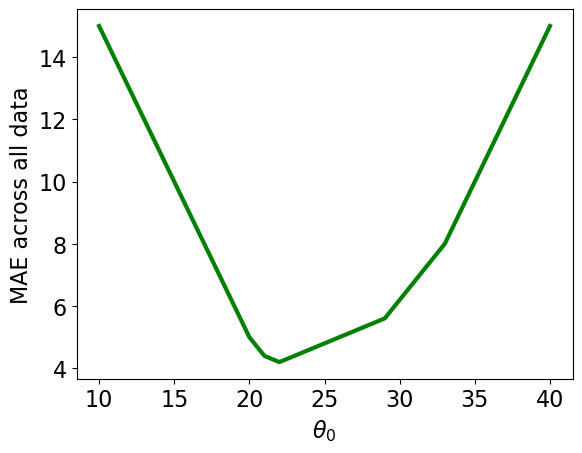

In [20]:
def mae_constant(theta_0, data):
    return np.mean(np.array([np.abs(y_obs - theta_0) for y_obs in data]), axis=0)

thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = mae_constant(thetas, boba)
plt.plot(thetas, l1_loss_thetas, color = 'green', lw=3);
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'MAE across all data');
# plt.savefig('l1_loss_average.png', bbox_inches = 'tight');

### Median Minimizes MAE for the Constant Model


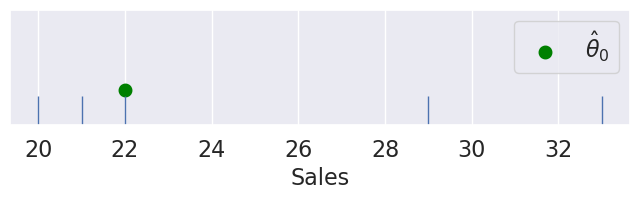

In [21]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

yobs = boba
thetahat = np.median(yobs)

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.scatter([thetahat], [-.1], color='green', lw=4, label=r"$\hat{\theta}_0$");
plt.xlabel("Sales")
plt.legend()
plt.yticks([])
# plt.savefig('boba_rug.png', bbox_inches = 'tight');
plt.show()

### Two Constant Models, Fit to Different Losses

In [22]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

nplots = 2
def plot_losses(data, title=None, theta_range=(10, 40)):
    thetas = np.linspace(theta_range[0], theta_range[1], 1000)
    l2_loss_thetas = mse_constant(thetas, data)
    thetahat_mse = np.mean(data)

    l1_loss_thetas = mae_constant(thetas, data)
    thetahat_mae = np.median(data)

    fig, axs = plt.subplots(1, nplots, figsize=(5*2+0.5, 3.5))
    axs[0].plot(thetas, l2_loss_thetas, lw=3);
    axs[0].scatter([thetahat_mse], [mse_constant(thetahat_mse, data)], s=100)
    axs[0].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mse:.1f}",
                    xy=(thetahat_mse, np.average(axs[0].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(r'$\theta_0$');
    axs[0].set_ylabel(r'MSE');

    axs[1].plot(thetas, l1_loss_thetas, color = 'green', lw=3);
    axs[1].scatter([thetahat_mae], [mae_constant(thetahat_mae, data)], color='green', s=100)
    axs[1].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mae:.1f}",
                    xy=(thetahat_mae, np.average(axs[1].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel(r'$\theta_0$');
    axs[1].set_ylabel(r'MAE');
    if title:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

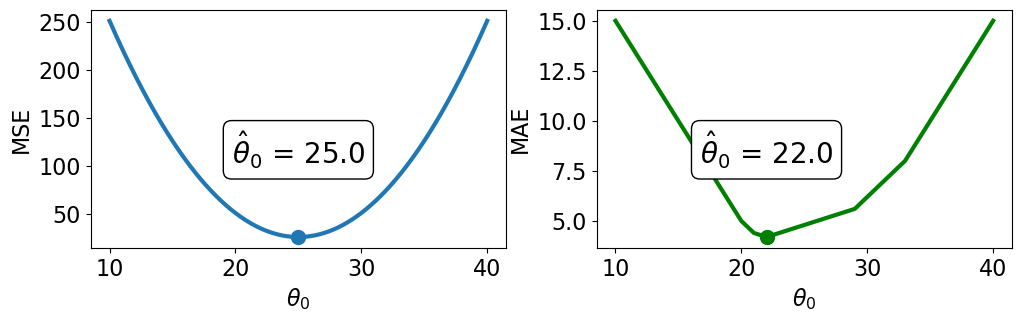

In [23]:
fig = plot_losses(boba)
plt.figure(fig)
# plt.savefig('loss_compare.png', bbox_inches = 'tight');
plt.show()

#### More loss comparison: Outliers

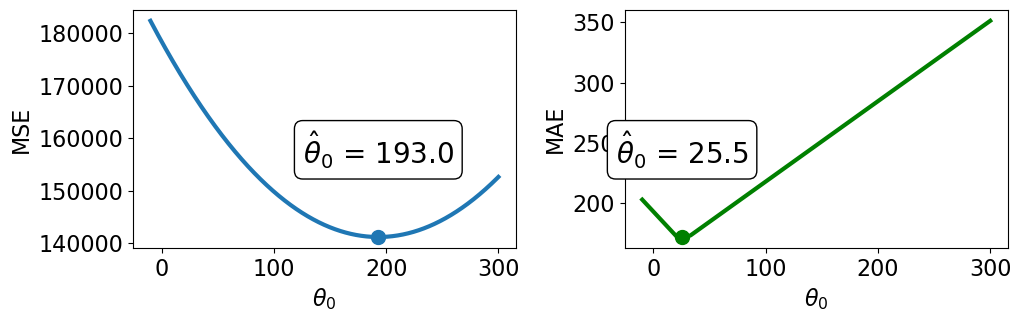

In [24]:
boba_outlier = np.array([20, 21, 22, 29, 33, 1033])
fig = plot_losses(boba_outlier, theta_range=[-10, 300])
plt.figure(fig)
# plt.savefig('loss_outlier.png', bbox_inches = 'tight');
plt.show()

#### Uniqueness under Different Loss Functions

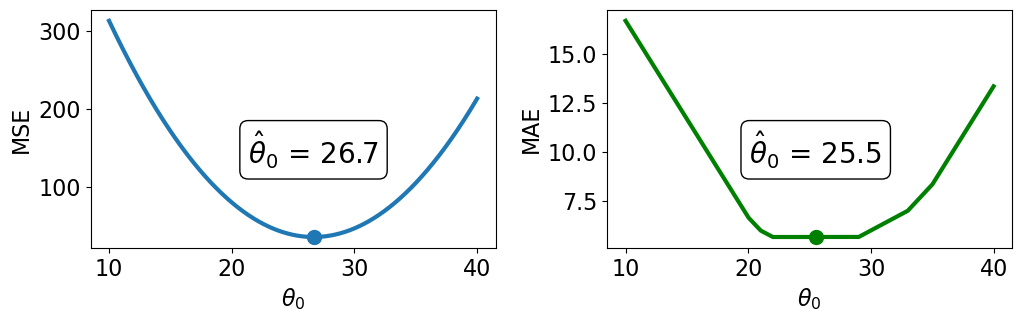

In [25]:
boba_even = np.array([20, 21, 22, 29, 33, 35])
fig = plot_losses(boba_even)
plt.figure(fig)
#plt.savefig('loss_unique.png', bbox_inches = 'tight');
plt.show()

#### Bonus: MAE loss curve for SLR?

We saw earlier that the MSE (average L2) loss curve for Simple Linear Regression is smooth and parabolic in 3 dimensions. What does the MAE for SLR curve look like?

It's **beyond the scope of this course**, but for the curious, the below cell plots the mean absolute error (average L1 loss) on the boba dataset for a simple linear regression model . I don't plot the minimum because I don't know if there's a closed form solution (you could solve it numerically with techniques you learn in lab).

Since the boba dataset didn't have input, I've arbitrarily used "temperature of that day" as input. I made up the numbers (assume degrees Farenheit).

In [26]:
boba_df = pd.DataFrame({"sales": [20, 21, 22, 29, 33],
                        "temps": [40, 44, 55, 70, 85]},
                       columns=["temps", "sales"])
boba_df

,temps,sales
0,40,20
1,44,21
2,55,22
3,70,29
4,85,33


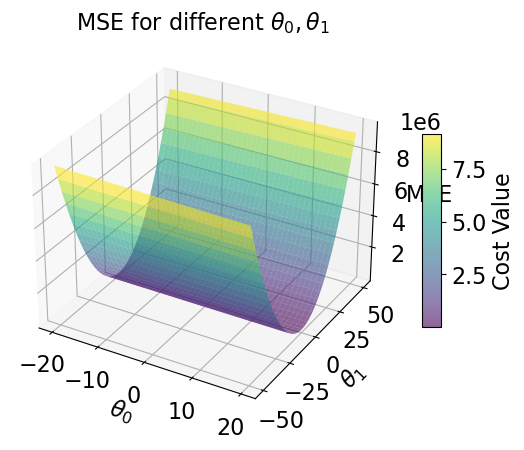

In [27]:
# Just run this cell
data_linear = boba_df

def mAe_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([np.abs(y - (theta_0+theta_1*x)) for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-20, 20, 80)
theta_1_values = np.linspace(-50, 50, 80)
mAe_values = np.array([[mse_linear(x,y,data_linear) for x in theta_0_values] for y in theta_1_values])

# Create the 3D plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(theta_0_values, theta_1_values)
surf = ax.plot_surface(X, Y, mAe_values, cmap='viridis', alpha=0.6)  # Use alpha to make it slightly transparent

# Create a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cost Value')

ax.set_title('MSE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MSE')
# plt.savefig('mse_linear_loss.png', bbox_inches = 'tight');
plt.show()

## Dugongs Part 2

### Residual Plot

In [28]:
dugongs = pd.read_csv("data/dugongs.csv")
dugongs.head()

,Length,Age
0,1.77,1.5
1,1.80,1.0
2,1.85,1.5
3,1.87,1.5
4,2.02,2.5


In [29]:
yobs = dugongs["Age"]      # The true observations y
xs = dugongs["Length"]     # Needed for linear predictions

theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
theta_0_hat = np.mean(yobs) - theta_1_hat * np.mean(xs)
yhats_linear = theta_0_hat + theta_1_hat * xs

In [30]:
np.corrcoef(xs, yobs)[0, 1]

0.8296474554905716

The correlation coefficient is pretty high...but there's an issue.

Let's first plot the Dugong linear fit again. It doesn't look so bad if we see it here.

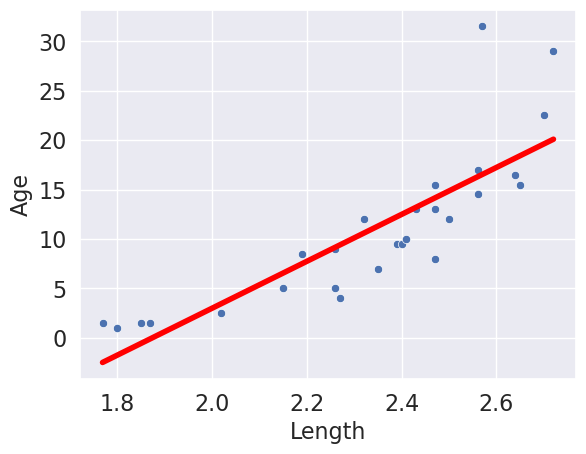

In [31]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

Let's further inspect by plotting residuals.

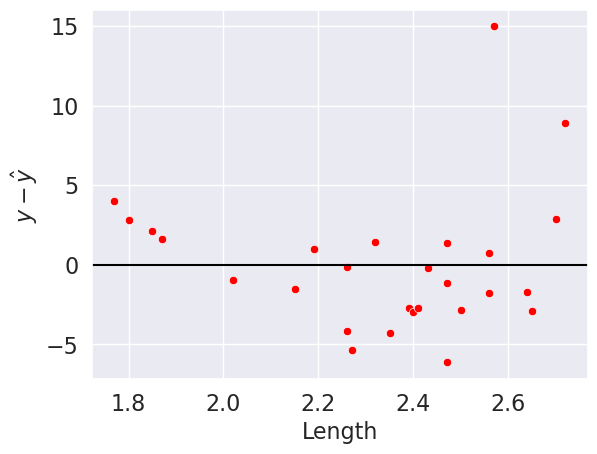

In [32]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$y - \hat{y}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

### Log transformation of y

We could fit a line to the linear model that relates $ z = \log(y)$ to $x$:

$$ 
\Large
\hat{z} = \theta_0 + \theta_1 x
$$

In [33]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     # Needed for linear predictions

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

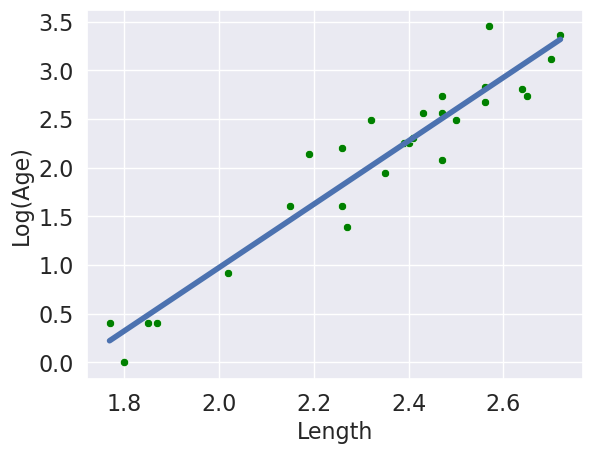

In [34]:
sns.scatterplot(x=xs, y=zobs, color='green')
plt.plot(xs, zhats_linear, lw=4)
# plt.savefig('dugong_zline.png', bbox_inches = 'tight');
plt.show()

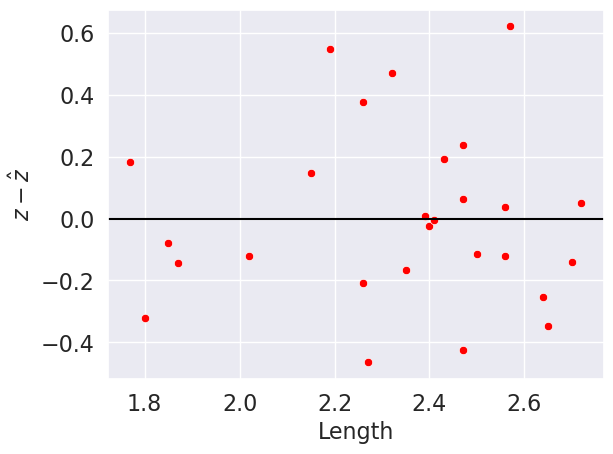

In [35]:
zresiduals = zobs - zhats_linear

sns.scatterplot(x=xs, y=zresiduals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$z - \hat{z}$")
# plt.savefig('dugong_zresiduals.png', bbox_inches = 'tight');
plt.show()

### Map back to the original coordinates

$$ 
\begin{align*}
\hat{z} &= \theta_0 + \theta_1 x\\
\widehat{\log(y)}&= \theta_0 + \theta_1 x\\
e^{\widehat{\log(y)}}&= e^{\theta_0 + \theta_1 x}\\
\hat{y}&=e^{\theta_0 + \theta_1 x}\
\end{align*}
$$

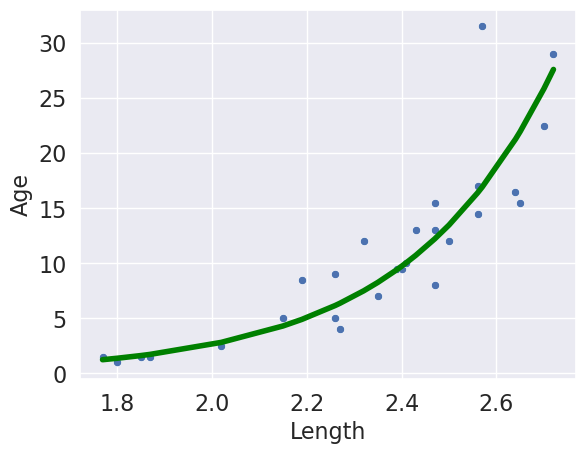

In [36]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, ypred, color='green', lw=4)
# plt.savefig('dugong_curve.png', bbox_inches = 'tight');
plt.show()